In [24]:
import numpy as np
from scipy import stats
from scipy.fft import fft
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dummyDataFile = pd.read_excel("dummyData.xlsx")

dummyDataFile

,DATE,TEMP,HUMI,hello,Unnamed: 4,Unnamed: 5
0,NaN,25,28,NaN,NaN,NaN
1,NaN,28,31,NaN,NaN,NaN
2,NaN,30,26,NaN,NaN,NaN
3,NaN,26,29,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaa
4,NaN,28,32,NaN,NaN,NaN
...,...,...,...,...,...,...
2866,NaN,29,28,NaN,NaN,NaN
2867,NaN,25,26,NaN,NaN,NaN
2868,NaN,29,30,NaN,NaN,NaN
2869,NaN,26,27,NaN,NaN,NaN


In [4]:
temphumiDF = pd.read_excel("dummyData.xlsx", "Sheet1", skiprows=0, nrows= 2871, usecols="B:C")

temphumiDF

,TEMP,HUMI
0,25,28
1,28,31
2,30,26
3,26,29
4,28,32
...,...,...
2866,29,28
2867,25,26
2868,29,30
2869,26,27


In [5]:
tempOnly = temphumiDF['TEMP'].tolist()
humiOnly = temphumiDF['HUMI'].tolist()

# tempOnly
# humiOnly

In [6]:
tempVector = np.array(tempOnly)
humiVector = np.array(humiOnly)

print(tempVector)
print(humiVector)

[25 28 30 ... 29 26 28]
[28 31 26 ... 30 27 28]


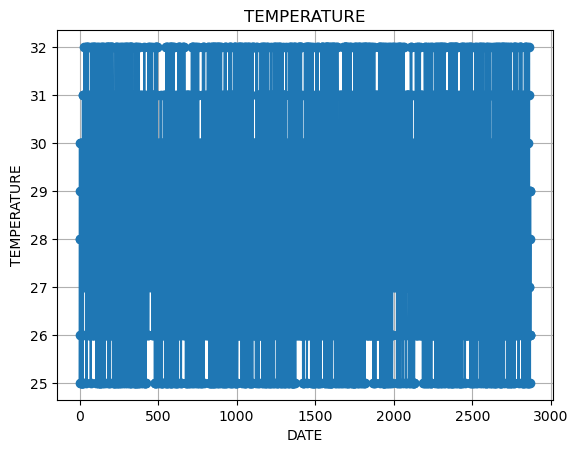

In [7]:
plt.plot(tempVector, marker='o') # dapat (date, tempVector)


plt.xlabel("DATE")
plt.ylabel("TEMPERATURE")
plt.title("TEMPERATURE")
plt.grid()
plt.show()


In [66]:
def getMean(x):
    return np.mean(x)

def getMedian(x):
    return np.median(x)

def getMode(x):
    # return stats.mode(x, axis=None, keepdims=True)
    
    # ----------------------------------------------
    
    vals, counts = np.unique(x, return_counts=True)
    mode = np.argwhere(counts == np.max(counts))
    return vals[mode].flatten()

def getVariance(x):
    return np.var(x)

def getStandardDeviation(x):
    # standard deviation represents noise and other interference.
    #  the standard deviation is not important in itself, but only in comparison to the mean.
    return np.std(x)

def getSignalToNoiseRatio(mean, std):
    return mean / std

def getCoefficientOfVariation(mean, std):
    #  a signal (or other group of measure values) with a CV of 2%, has an SNR of 50.  Better data means a higher value for the SNR and a lower value for the CV.
    return (std / mean) * 100

In [67]:
mean = getMean(tempVector)
median = getMedian(tempVector)
mode = getMode(tempVector)
variance = getVariance(tempVector)
standardDeviation = getStandardDeviation(tempVector)
snr = getSignalToNoiseRatio(mean, standardDeviation)
cv = getCoefficientOfVariation(mean, standardDeviation)

print(f'Mean = {mean}')
print(f'Median = {median}')
print(f'Mode = {mode}')
print(f'Variance = {variance}')
print(f'STD = {standardDeviation}')
print(f'SNR = {snr}')
print(f'CV = {cv}')


Mean = 28.44966910484152
Median = 28.0
Mode = [26]
Variance = 5.238759033664089
STD = 2.288833553071103
SNR = 12.429767584745697
CV = 8.04520272146713
